In [1]:
import rasterio 
import rasterio.plot
from rasterio.plot import show
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = "liegevert.tif"
tiff = rasterio.open(data)
tiff

<open DatasetReader name='liegevert.tif' mode='r'>

In [3]:
#tiff_read = tiff.read(1, window=((20000,50000), (200000,500000)))

In [4]:
#plt.imshow(tiff_read)

In [5]:
# data = tiff.read()
# data

In [29]:
tiff.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 1615,
 'height': 1222,
 'count': 4,
 'crs': CRS.from_epsg(3812),
 'transform': Affine(4.658756137479542, 0.0, 733397.0544189853,
        0.0, -4.658756137479542, 650620.0)}

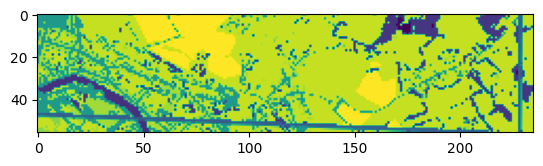

In [22]:
import rasterio
from matplotlib import pyplot as plt
from rasterio.windows import Window
# Define a window to read
window = Window(col_off=500, row_off=500, width=1000, height=1000)
with rasterio.open('liege_color_mayb.tiff') as src:
    # Read the GeoTIFF as a numpy array within the defined window
    img = src.read(1, window=window)
    # Display the image
    plt.imshow(img)
    plt.show()

In [30]:
tiff.name
tiff.count
tiff.shape
tiff.width
tiff.driver
tiff.transform
tiff.crs

CRS.from_epsg(3812)

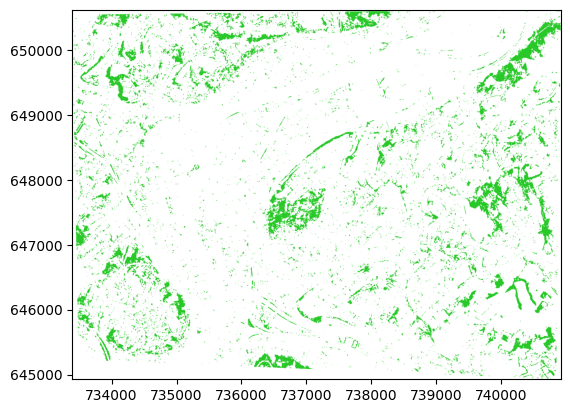

<Axes: >

In [31]:
show(tiff)

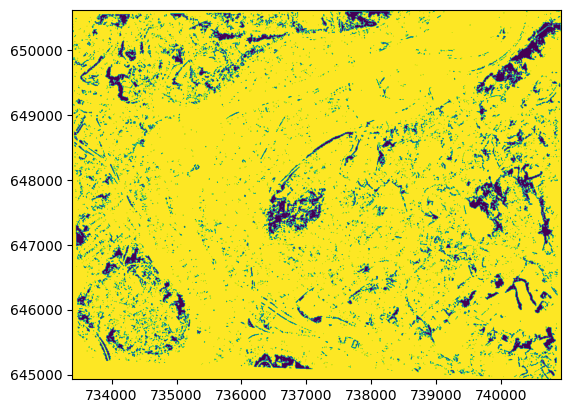

<Axes: >

In [32]:
show((tiff, 2), transform=tiff.transform)

In [33]:
import numpy as np
from rasterio.features import shapes
import geopandas as gpd
import json
# Load the GeoTiff
with rasterio.open('liege.tif') as src:
    # Convert the first band to float32
    image = src.read(1).astype(np.float32)
    # Extract shapes and values
    results = (
        {'properties': {'raster_value': v}, 'geometry': s}
        for i, (s, v) in enumerate(shapes(image, transform=src.transform))
    )
# Convert the results to a GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(results)
# Convert the GeoDataFrame to GeoJSON
geojson = gdf.to_json()
# Save the GeoJSON to a file
with open("file.geojson", "w") as f:
    f.write(json.dumps(json.loads(geojson), indent=4))

In [54]:
import rioxarray as rxr
import xarray as xr

In [63]:
import rasterio
import numpy as np
from rasterio.features import shapes
import geopandas as gpd
# Load the GeoTiff
with rasterio.open('brussel_geotiff (2).tif') as src:
    # Convert the first band to float32
    image = src.read(1).astype(np.float32)
    # Extract shapes and values
    results = (
        {'properties': {'raster_value': v}, 'geometry': s}
        for i, (s, v) in enumerate(shapes(image, transform=src.transform))
    )
# Convert the results to a GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(results)
# Explicitly set the CRS of the GeoDataFrame to the original CRS
gdf.crs = "EPSG:3857"
# Convert the GeoDataFrame to latitude/longitude
gdf = gdf.to_crs("EPSG:4326")
# Compute the centroids of the polygons
centroids = gdf.geometry.centroid
# Add the centroids as new columns in the GeoDataFrame
gdf['centroid_lon'] = centroids.x
gdf['centroid_lat'] = centroids.y
# Select the columns to include in the CSV
csv_data = gdf[['centroid_lon', 'centroid_lat', 'raster_value']]
# Save the data to a CSV file
csv_data.to_csv('centroid.csv', index=False)

C:\Users\Décrypte\AppData\Local\Temp\ipykernel_12888\4210300692.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.geometry.centroid
